<a href="https://colab.research.google.com/github/sayevvv/PCVK_2025/blob/main/Modul1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
import cv2 as cv
from google.colab.patches import cv2_imshow #for image displat
from skimage import io
from PIL import Image
import matplotlib.pylab as plt

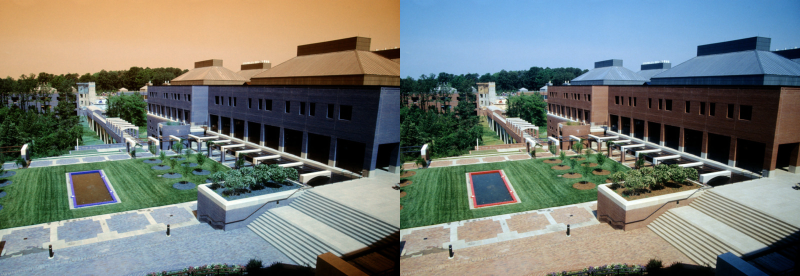

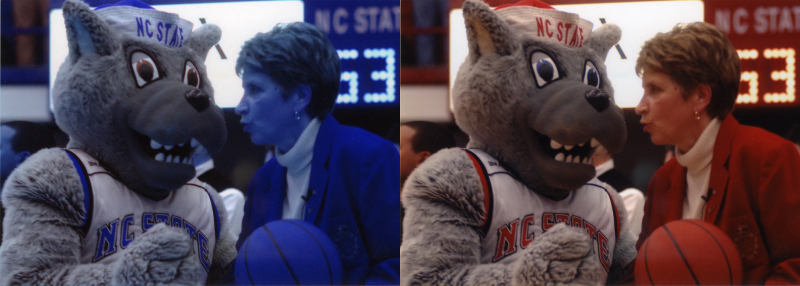

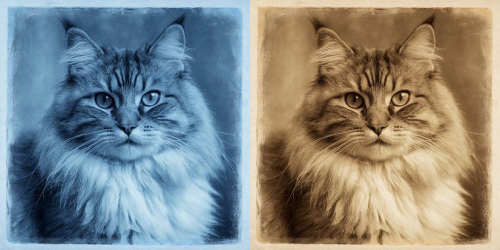

In [7]:
urls = ["https://iiif.lib.ncsu.edu/iiif/0052574/full/800,/0/default.jpg",
"https://iiif.lib.ncsu.edu/iiif/0016007/full/800,/0/default.jpg",
"https://api.images.cat/500/500/0c25194a-86d4-471e-9216-adb17d668e18"]

for url in urls:
  image = io.imread(url) #read image
  image = cv.resize(image, (0,0), fx=0.5, fy=0.5) #resize image to half size
  image_2 = cv.cvtColor(image, cv.COLOR_BGR2RGB) #convert color to RGB
  final_frame = cv.hconcat((image, image_2)) #concatenate image
  cv2_imshow(final_frame) #show image

resolusi image: tinggi x lebar =  250  x  250


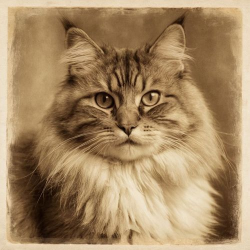

In [8]:
tinggi = image_2.shape[0]
lebar= image_2.shape[1]
print("resolusi image: tinggi x lebar = ", tinggi, " x ", lebar)
cv2_imshow(image_2)

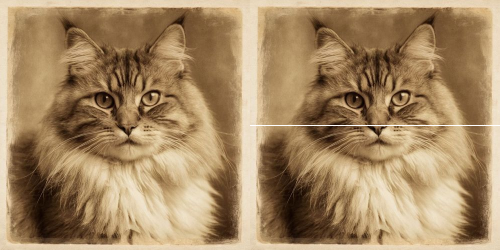

In [10]:
image_2 = cv.cvtColor(image, cv.COLOR_BGR2RGB)
image_3 = cv.cvtColor(image, cv.COLOR_BGR2RGB)

#membuatgaris horizontal ditengah image
for y in range(lebar):
  image_3[int((tinggi)/2), y] = [255, 255, 255]

final_frame = cv.hconcat((image_2, image_3))
cv2_imshow(final_frame)

Pertanyaan


1.   Jelaskan, mengapa pada modul praktikum ini   eksekusi kode Python dilakukan menggunakan Google Colab?

2. Jelaskan mengenai kegunaan setiap library pada praktikum langkah ke delapan? Apakah semua library tersebut harus digunakan dalam praktikum sesi ini?

3. Pada uji coba langkah ke-9 terdapat potongan kode program sebagai berikut :
image = cv.resize(image, (0,0), fx=0.5, fy=0.5)
Apa kegunaan kode program tersebut?dan apa pengaruhnya jika tidak dilakukan?

4. Perhatikan potongan kode progam berikut :

   Python

    membuat garis horizontal ditengah image
    for y in range (lebar):
      image_3[int((tinggi)/2),y] = [255,255,255]
    Apakah kegunaan kode [255,255,255] ? Jelaskan!

    Jelaskan keterkaitan antara pixel dan juga resolusi gambar yang tinggi ataupun rendah!



#Jawaban
1. Karena google colab tidak memerlukan konfigurasi, akses gratis ke GPU & TPU, dan kemudahan untuk berkolaborasi

2. openCV digunakan untuk manipulasi gambar, skimage.io untuk membaca gambar dari URL dan memuatnya ke array, cv2_imshow untuk menampilkan gambar, numpy sebagai dependancy cv2 dan skimage, sisanya belum digunakan.

3. mengubah ukuran resolusi gambar

4. representasi model warna RGB yang menghasilkan warna putih pada garis

5. Resolusi adalah jumlah total piksel, semakin banyak piksel, semakin tinggi resolusinya. Berlaku juga sebaliknya


#TUGAS


Perbandingan Gambar: Kiri (Asli) vs Kanan (Dengan Garis Vertikal & Diagonal)


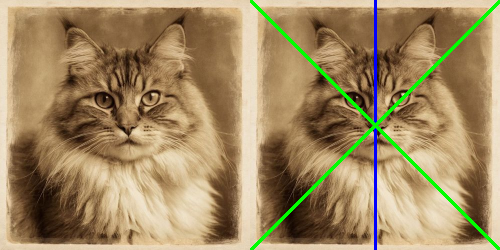

In [15]:
# Buat Garis vertikal dan garis menyilang diagonal pada image keluaran
image_2 = cv.cvtColor(image, cv.COLOR_BGR2RGB)
image_3 = cv.cvtColor(image, cv.COLOR_BGR2RGB)

# 1. Mengambil dimensi gambar untuk menentukan koordinat garis
tinggi, lebar, _ = image_3.shape

# 2. Menentukan warna untuk garis (dalam format RGB)
warna_merah = (255, 0, 0)
warna_hijau = (0, 255, 0)
ketebalan = 2 # Ketebalan garis dalam piksel

# 3. Membuat garis vertikal di tengah image_3
# Titik awal adalah (tengah-lebar, atas) dan titik akhir adalah (tengah-lebar, bawah)
titik_awal_vertikal = (int(lebar / 2), 0)
titik_akhir_vertikal = (int(lebar / 2), tinggi)
cv.line(image_3, titik_awal_vertikal, titik_akhir_vertikal, warna_merah, ketebalan)

# 4. Membuat garis menyilang (diagonal) pada image_3
# Garis diagonal 1: dari kiri-atas ke kanan-bawah
titik_awal_diag1 = (0, 0)
titik_akhir_diag1 = (lebar, tinggi)
cv.line(image_3, titik_awal_diag1, titik_akhir_diag1, warna_hijau, ketebalan)

# Garis diagonal 2: dari kanan-atas ke kiri-bawah
titik_awal_diag2 = (lebar, 0)
titik_akhir_diag2 = (0, tinggi)
cv.line(image_3, titik_awal_diag2, titik_akhir_diag2, warna_hijau, ketebalan)


# 5. Menggabungkan image_2 (clean) dan image_3 (dengan garis) untuk perbandingan
perbandingan_akhir = cv.hconcat((image_2, image_3))

# 6. Menampilkan hasil perbandingan
print("Perbandingan Gambar: Kiri (Asli) vs Kanan (Dengan Garis Vertikal & Diagonal)")
cv2_imshow(perbandingan_akhir)

Perbandingan Gambar: Kiri (Asli) vs Kanan (Dengan Garis Horizontal Putih)


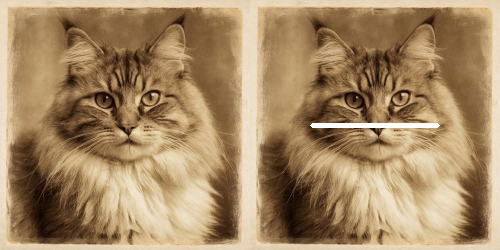

In [16]:
#Buat Garis horizontal berwarna putih dibagian tengah gambar dengan panjang tertentu
image_2 = cv.cvtColor(image, cv.COLOR_BGR2RGB)
image_3 = cv.cvtColor(image, cv.COLOR_BGR2RGB)

# 1. Mengambil dimensi gambar
tinggi, lebar, _ = image_3.shape

# 2. Menentukan properti garis
warna_putih = (255, 255, 255)
ketebalan = 3 # Dibuat sedikit lebih tebal agar terlihat jelas

# 3. Menghitung panjang dan posisi garis horizontal di tengah
# Kita buat panjang garisnya 50% dari lebar gambar
panjang_garis = int(lebar * 0.5)

# Hitung titik awal (x1) dan akhir (x2) agar garisnya pas di tengah
y_posisi = int(tinggi / 2) # Posisi vertikal garis
x_awal = int((lebar - panjang_garis) / 2)
x_akhir = x_awal + panjang_garis

titik_awal = (x_awal, y_posisi)
titik_akhir = (x_akhir, y_posisi)

# 4. Menggambar garis pada image_3
cv.line(image_3, titik_awal, titik_akhir, warna_putih, ketebalan)

# 5. Menggabungkan image_2 (clean) dan image_3 (dengan garis) untuk perbandingan
perbandingan_akhir = cv.hconcat((image_2, image_3))

# 6. Menampilkan hasil perbandingan
print("Perbandingan Gambar: Kiri (Asli) vs Kanan (Dengan Garis Horizontal Putih)")
cv2_imshow(perbandingan_akhir)

Perbandingan Gambar: Kiri (Asli) vs Kanan (Dengan Kotak Putih)


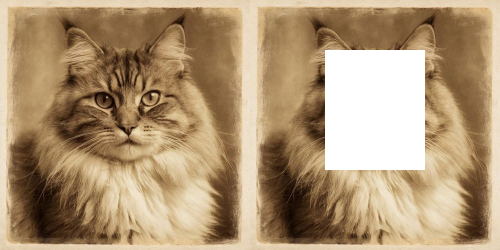

In [19]:
#Buat kotak menggunakan kumpulan pixel warna putih di sembarang tempat dalam gambar
image_2 = cv.cvtColor(image, cv.COLOR_BGR2RGB)
image_3 = cv.cvtColor(image, cv.COLOR_BGR2RGB)

# 1. Mengambil dimensi gambar
tinggi, lebar, _ = image_3.shape

# 2. Menentukan properti kotak di posisi sembarang
# Posisi pojok kiri-atas kotak
x_awal = int(lebar * 0.3)  # Misal, 60% dari lebar
y_awal = int(tinggi * 0.2) # Misal, 20% dari tinggi

# Ukuran kotak
lebar_kotak = 100
tinggi_kotak = 120

# Warna
warna_putih = (255, 255, 255)

# 3. Menggambar kotak dengan mengubah warna piksel satu per satu
# Pastikan kotak tidak keluar dari batas gambar
for y in range(y_awal, y_awal + tinggi_kotak):
    for x in range(x_awal, x_awal + lebar_kotak):
        # Cek jika piksel (y,x) masih dalam area gambar
        if y < tinggi and x < lebar:
            image_3[y, x] = warna_putih

# 4. Menggabungkan image_2 (clean) dan image_3 (dengan kotak) untuk perbandingan
perbandingan_akhir = cv.hconcat((image_2, image_3))

# 5. Menampilkan hasil perbandingan
print("Perbandingan Gambar: Kiri (Asli) vs Kanan (Dengan Kotak Putih)")
cv2_imshow(perbandingan_akhir)